In [10]:
include("../../src/Finite_Vol/pnjl_FV.jl")
using Plots 
using LaTeXStrings
using DataFrames, CSV
using QuadGK, LinearAlgebra


In [30]:
Rs = 50:-0.1:1
Lambda_tes1 = 1.8 ./ Rs
Lambda_tes2 = 1 ./ (sqrt(2).* Rs)
Lambda_I1 = similar(Rs)
Lambda_I2 = similar(Rs)
for (i, R) in enumerate(Rs)
    V = (4/3)*pi*R^3
    c = R
    ab = (3*V)/(4*pi) / c  
    e = 0.0
    a = sqrt(ab / sqrt(1 - e^2))
    b = sqrt(ab * sqrt(1 - e^2)) 
    Lambda_I1[i] = Find_IR_el(a, b, c)
    Lambda_I2[i] = Find_IR_el(a, b, c,modes="N")
end




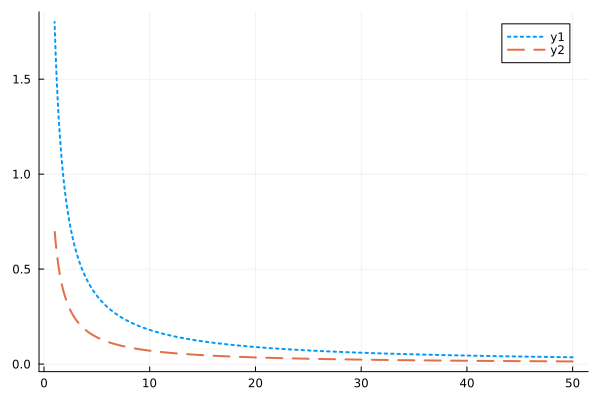

In [31]:
plot(Rs, Lambda_I1, lw=2, linestyle=:dot)
plot!(Rs, Lambda_I2, lw=2, linestyle=:dash)

In [23]:
es = 0.0:0.01:0.99
Lambda_J1 = similar(es)
Lambda_J2 = similar(es)
for (i, e) in enumerate(es)
    R = 7.0
    V = (4/3)*pi*R^3
    c = R
    ab = (3*V)/(4*pi) / c  
    #e = 0.0
    a = sqrt(ab / sqrt(1 - e^2))
    b = sqrt(ab * sqrt(1 - e^2)) 
    Lambda_J1[i] = Find_IR_el(a, b, c)
    Lambda_J2[i] = Find_IR_el(a, b, c;modes="N")
   # println("e=$(e), Lambda_I=$(Lambda_I2[i])")
end


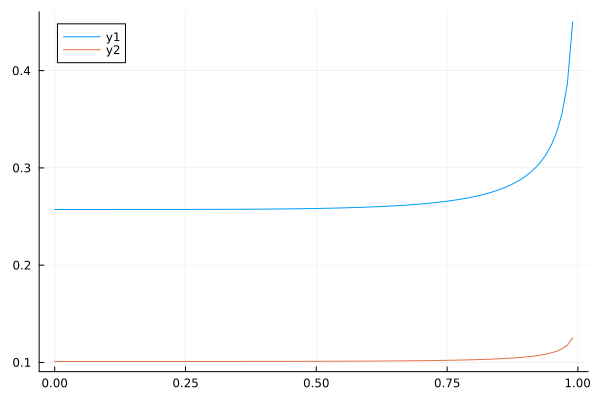

In [24]:
plot(es, Lambda_J1)
plot!(es, Lambda_J2)

In [52]:
# 计算不同离心率下的表面积（使用近似公式）
function surface_area_ellipsoid(a, b, c)
    # Knud Thomsen 近似公式
    p = 1.6075
    return 4π * ((a^p * b^p + a^p * c^p + b^p * c^p)/3)^(1/p)
end

function parametrize_by_shape(R, shape_param)
    """
    固定体积 V = (4/3)π*R³，通过 shape_param ∈ [0,1] 控制形状
    - shape_param = 0: 球形 (a=b=c=R)
    - shape_param → 1: 扁平椭球 (a,b增大，c减小)
    """
    V = (4/3)*pi*R^3
    
    # 方法1：指数缩放
    scale_factor = exp(shape_param * 3)  # 调整系数控制变化速度
    a = R * scale_factor^(1/3)
    b = R * scale_factor^(1/3)
    c = R / scale_factor^(2/3)
    
    return a, b, c
end


function parametrize_deformation(R, δ;para=2.0)
    """
    δ: 变形参数 (0 ≤ δ < ∞)
    - δ = 0: 球形
    - δ > 0: 扁平椭球（a=b > c）
    - 表面积单调递增
    """
    V = (4/3)*π*R^3
    
    # 基于 β₂ 的简化
    β₂ = tanh(δ)  # 保证 β₂ < 1
  #@  para = 1.8
    a = R * (1 + para * β₂)^(-2/3)
    b = a
    c = V / ((4/3)*π*a*b)
    
    return a, b, c
end



parametrize_deformation (generic function with 1 method)

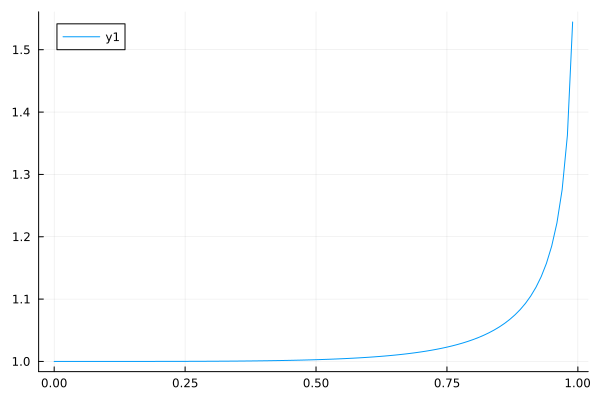

In [37]:
# 示例：R=20, V固定
R = 20.0
V = (4/3)*pi*R^3
c = R
ab = (3*V)/(4*pi) / c

es = 0.0:0.01:0.99
S_values = similar(es)

for (i, e) in enumerate(es)
    a = sqrt(ab / sqrt(1 - e^2))
    b = sqrt(ab * sqrt(1 - e^2))
    S_values[i] = surface_area_ellipsoid(a, b, c) / (4*pi * R^2)
end
plot(es, S_values)

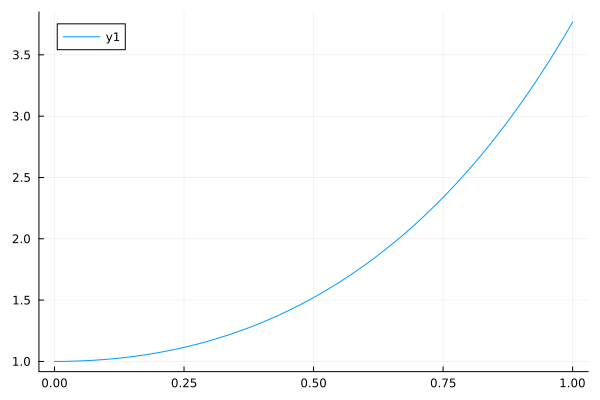

In [53]:
# 使用示例
R = 20.0
scale_factors = 0.0:0.01:1.00
S_vv = similar(scale_factors)
for (i, s) in enumerate(scale_factors)
    a, b, c = parametrize_by_shape(R, s)
    S_vv[i] = surface_area_ellipsoid(a, b, c) / (4π * R^2)
end
plot(scale_factors, S_vv)

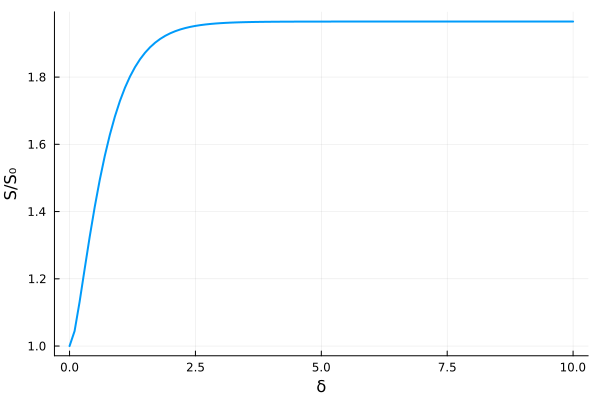

In [54]:
# 测试
R = 10.0
δ_values = 0.0:0.1:10.0
S_values = similar(δ_values)

for (i, δ) in enumerate(δ_values)
    a, b, c = parametrize_deformation(R, δ;para=3.0)
    S_values[i] = surface_area_ellipsoid(a, b, c) / (4π*R^2)
end

plot(δ_values, S_values, xlabel="δ", ylabel="S/S₀", lw=2, label="")